(array([0.00063165, 0.        , 0.00063165, 0.00063165, 0.00063165,
        0.        , 0.00126329, 0.00189494, 0.00126329, 0.00063165,
        0.00252658, 0.00063165, 0.00189494, 0.00442152, 0.00378987,
        0.0069481 , 0.00252658, 0.0069481 , 0.00568481, 0.00947468,
        0.00821139, 0.00568481, 0.0069481 , 0.01200126, 0.01200126,
        0.0069481 , 0.01010633, 0.01073797, 0.01200126, 0.00757974,
        0.00884304, 0.00884304, 0.00568481, 0.00947468, 0.00821139,
        0.00252658, 0.00757974, 0.00631645, 0.00189494, 0.00315823,
        0.00505316, 0.00884304, 0.01452784, 0.02526582, 0.04547847,
        0.07390251, 0.09158858, 0.08148226, 0.06569112, 0.03221392,
        0.02400253, 0.01642278, 0.03031898, 0.0277924 , 0.02968733,
        0.02968733, 0.03221392, 0.04611011, 0.03726708, 0.05053163,
        0.04358353, 0.04737341, 0.04926834, 0.05368986, 0.05179492,
        0.0555848 , 0.0543215 , 0.05305821, 0.05053163, 0.04484682,
        0.05495315, 0.03663543, 0.03600379, 0.04

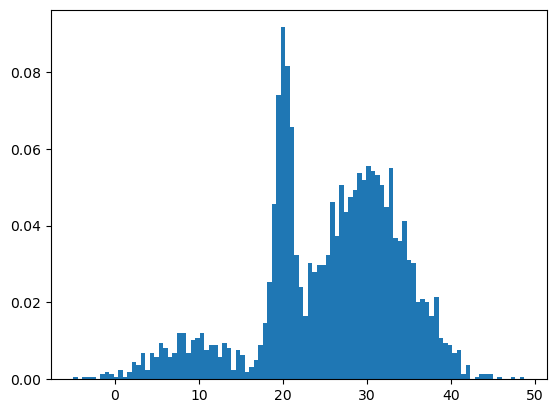

In [109]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

x = np.load('formationchannels.npy')
plt.hist(x, bins= 100, density = True)
    
    

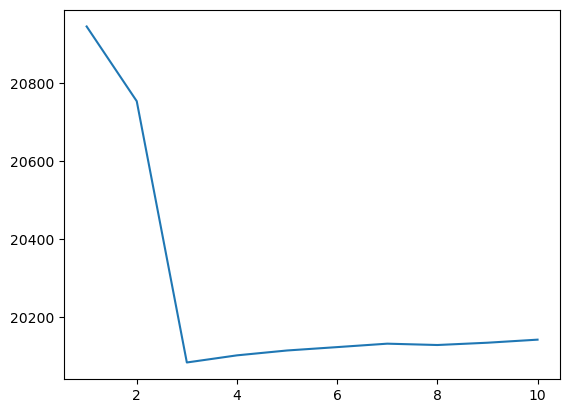

In [110]:
aic_results = np.array(())
for n_gaus in range(1,11):
    gm = GaussianMixture(n_components=n_gaus, random_state=0).fit(x,y=None)
    aic_results = np.append(aic_results, gm.aic(x))
N_G = np.arange(11)
N_G = np.delete(N_G, 0)
plt.plot(N_G, aic_results)


(array([0.00063165, 0.        , 0.00063165, 0.00063165, 0.00063165,
        0.        , 0.00126329, 0.00189494, 0.00126329, 0.00063165,
        0.00252658, 0.00063165, 0.00189494, 0.00442152, 0.00378987,
        0.0069481 , 0.00252658, 0.0069481 , 0.00568481, 0.00947468,
        0.00821139, 0.00568481, 0.0069481 , 0.01200126, 0.01200126,
        0.0069481 , 0.01010633, 0.01073797, 0.01200126, 0.00757974,
        0.00884304, 0.00884304, 0.00568481, 0.00947468, 0.00821139,
        0.00252658, 0.00757974, 0.00631645, 0.00189494, 0.00315823,
        0.00505316, 0.00884304, 0.01452784, 0.02526582, 0.04547847,
        0.07390251, 0.09158858, 0.08148226, 0.06569112, 0.03221392,
        0.02400253, 0.01642278, 0.03031898, 0.0277924 , 0.02968733,
        0.02968733, 0.03221392, 0.04611011, 0.03726708, 0.05053163,
        0.04358353, 0.04737341, 0.04926834, 0.05368986, 0.05179492,
        0.0555848 , 0.0543215 , 0.05305821, 0.05053163, 0.04484682,
        0.05495315, 0.03663543, 0.03600379, 0.04

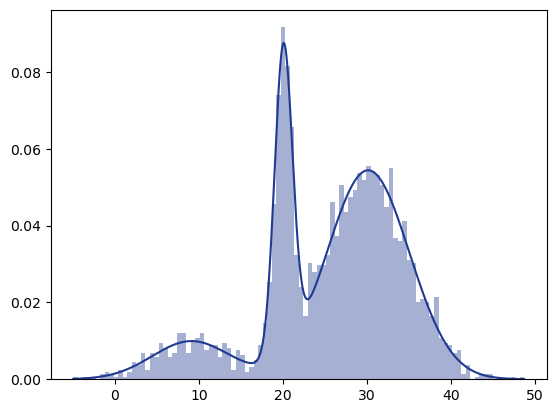

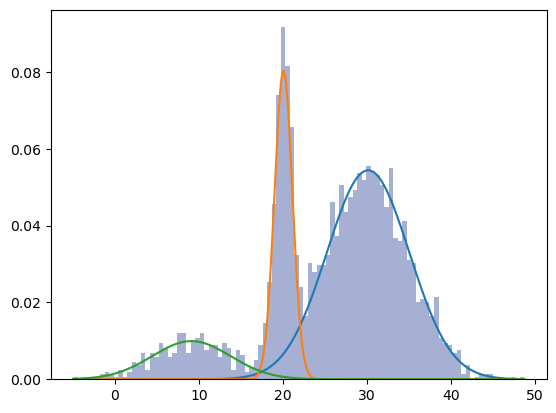

In [111]:
n_gaus_corr = np.where(aic_results== min(aic_results)) 
n_gaus_corr = n_gaus_corr[0][0] + 1
gm = GaussianMixture(n_components=n_gaus_corr, random_state=0).fit(x,y=None)

def sum_dist(x_data):
    dist_tot = np.zeros(len(x_data))
    dist_tot = dist_tot[:, np.newaxis]
    for n in range(n_gaus_corr):
        dist_tot += gm.weights_[n]*norm.pdf(x_data, gm.means_[n], np.sqrt(gm.covariances_[n]))
    return dist_tot


xmin = min(x)
xmax = max(x)
x_data = np.linspace(xmin, xmax, 10000)

fig1, ax1 = plt.subplots()
ax1.plot(x_data, sum_dist(x_data), color = "#1F3A93")
ax1.hist(x, bins= 100, density = True, color = "#1F3A93", alpha = 0.4)

fig2, ax2 = plt.subplots() #DA AGGIUNGERE LE PORZIONI DELL'ISTOGRAMMA
ax2.plot(x_data, gm.weights_[0]*norm.pdf(x_data, gm.means_[0], np.sqrt(gm.covariances_[0])))
ax2.plot(x_data, gm.weights_[1]*norm.pdf(x_data, gm.means_[1], np.sqrt(gm.covariances_[1])))
ax2.plot(x_data, gm.weights_[2]*norm.pdf(x_data, gm.means_[2], np.sqrt(gm.covariances_[2])))
ax2.hist(x, bins= 100, density = True, color = "#1F3A93", alpha = 0.4)

